# K-Nearest Neighbor

A simple hands-on explanation.

In [1]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_frame = pd.read_csv("../datasets/chicago_taxi_train.csv")
data_frame.head()

,TRIP_START_TIMESTAMP,TRIP_END_TIMESTAMP,TRIP_START_HOUR,TRIP_SECONDS,TRIP_MILES,TRIP_SPEED,PICKUP_CENSUS_TRACT,DROPOFF_CENSUS_TRACT,PICKUP_COMMUNITY_AREA,DROPOFF_COMMUNITY_AREA,FARE,TIPS,TIP_RATE,TOLLS,EXTRAS,TRIP_TOTAL,PAYMENT_TYPE,COMPANY
0,05/17/2022 7:15:00 AM,05/17/2022 7:45:00 AM,7.25,2341,2.57,4.0,NaN,NaN,NaN,17.0,31.99,2.0,6.3,0.0,0.0,33.99,Mobile,Flash Cab
1,05/17/2022 5:15:00 PM,05/17/2022 5:30:00 PM,17.25,1074,1.18,4.0,NaN,1.703108e+10,NaN,8.0,9.75,3.0,27.9,0.0,1.0,14.25,Credit Card,Flash Cab
2,05/17/2022 5:15:00 PM,05/17/2022 5:30:00 PM,17.25,1173,1.29,4.0,1.703132e+10,1.703108e+10,32.0,8.0,10.25,0.0,0.0,0.0,0.0,10.25,Cash,Sun Taxi
3,05/17/2022 6:00:00 PM,05/17/2022 7:00:00 PM,18.00,3360,3.70,4.0,1.703132e+10,1.703124e+10,32.0,24.0,23.75,0.0,0.0,0.0,1.0,24.75,Cash,Choice Taxi Association
4,05/17/2022 5:00:00 PM,05/17/2022 5:30:00 PM,17.00,1044,1.15,4.0,1.703132e+10,1.703108e+10,32.0,8.0,10.00,0.0,0.0,0.0,0.0,10.00,Cash,Flash Cab


We're going to try to predict the _payment type_ based on two other variables. Let's try _trip_start_hour_ and _fare_. We'll break the payments types into cash and other to simplify the process, then plot the data on a 2-D graph.

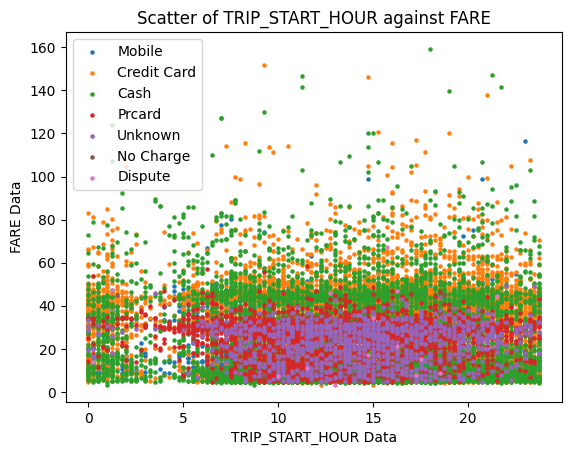

In [2]:
types = data_frame['PAYMENT_TYPE'].unique()
for i, type in enumerate(types):
    subset = data_frame[data_frame['PAYMENT_TYPE'] == type]
    plt.scatter(subset['TRIP_START_HOUR'], subset['FARE'], label=type, s=5)


plt.title(f"Scatter of {data_frame['TRIP_START_HOUR'].name} against {data_frame['FARE'].name}")
plt.ylabel(f'{data_frame['FARE'].name} Data')
plt.xlabel(f'{data_frame['TRIP_START_HOUR'].name} Data')
plt.legend()
plt.show()

This is too many points to really see what's going on. Lets try the same thing with a smaller subset...

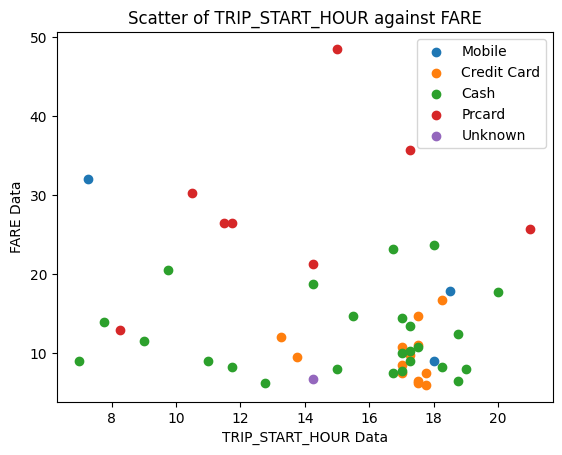

In [3]:
mini_frame = data_frame[0:50]

types = mini_frame['PAYMENT_TYPE'].unique()
for i, type in enumerate(types):
    subset = mini_frame[mini_frame['PAYMENT_TYPE'] == type]
    plt.scatter(subset['TRIP_START_HOUR'], subset['FARE'], label=type)

#plt.scatter(data_frame['TRIP_START_HOUR'], data_frame['FARE'], s=5)
plt.title(f"Scatter of {mini_frame['TRIP_START_HOUR'].name} against {mini_frame['FARE'].name}")
plt.ylabel(f'{mini_frame['FARE'].name} Data')
plt.xlabel(f'{mini_frame['TRIP_START_HOUR'].name} Data')
plt.legend()
plt.show()

The goal now is to calculate how far any given point is from all the other points. Once this is done, we can choose the closest few and decide it must belong with them.

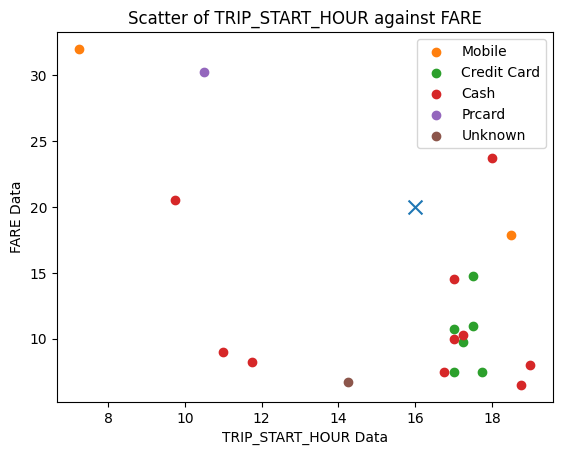

In [ ]:
import math

# Let's imagine we take a $20 trip at 4PM:
target = [16,20]
# And plot it with a big X
plt.scatter(target[0],target[1],marker='x',s=100)

mini_frame = data_frame[0:20]

types = mini_frame['PAYMENT_TYPE'].unique()
for i, type in enumerate(types):
    subset = mini_frame[mini_frame['PAYMENT_TYPE'] == type]
    plt.scatter(subset['TRIP_START_HOUR'], subset['FARE'], label=type)

plt.title(f"Scatter of {mini_frame['TRIP_START_HOUR'].name} against {mini_frame['FARE'].name}")
plt.ylabel(f'{mini_frame['FARE'].name} Data')
plt.xlabel(f'{mini_frame['TRIP_START_HOUR'].name} Data')
plt.legend()
plt.show()

Now we need to determine how far it is from each point in the mini_frame. 

Modify the following code to calculate the euclidean distance to each point in the dataframe. 

You should use _pythagorus' theorum_. For each point, find the distance from the target[0] to mini_frame['TRIP_START_HOUR'], square it, add it to the distance from target[1] to mini_frame['FARE'], take the square root, and store it in mini_frame['EUCLIDEAN_DISTANCE']. 

In [5]:
# Calculate Euclidean distance for each point in mini_frame
mini_frame['EUCLIDEAN_DISTANCE'] = np.sqrt((mini_frame['TRIP_START_HOUR'] - target[0])**2 + (mini_frame['FARE'] - target[1])**2)

# Display the mini_frame with distances
mini_frame[['TRIP_START_HOUR', 'FARE', 'PAYMENT_TYPE', 'EUCLIDEAN_DISTANCE']].head()


/tmp/ipykernel_3951/120578826.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mini_frame['EUCLIDEAN_DISTANCE'] = np.sqrt((mini_frame['TRIP_START_HOUR'] - target[0])**2 + (mini_frame['FARE'] - target[1])**2)


,TRIP_START_HOUR,FARE,PAYMENT_TYPE,EUCLIDEAN_DISTANCE
0,7.25,31.99,Mobile,14.843268
1,17.25,9.75,Credit Card,10.325938
2,17.25,10.25,Cash,9.829802
3,18.00,23.75,Cash,4.250000
4,17.00,10.00,Cash,10.049876


/tmp/ipykernel_3951/1056327585.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


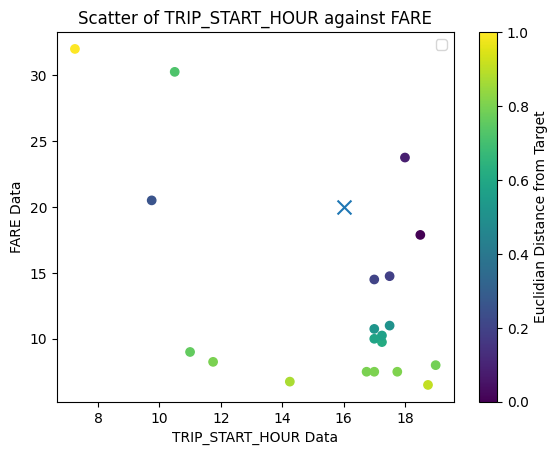

In [6]:
plt.scatter(mini_frame['TRIP_START_HOUR'], mini_frame['FARE'], c=mini_frame['EUCLIDEAN_DISTANCE'], cmap='viridis')
plt.scatter(target[0],target[1],marker='x',s=100)
plt.title(f"Scatter of {mini_frame['TRIP_START_HOUR'].name} against {mini_frame['FARE'].name}")
plt.ylabel(f'{mini_frame['FARE'].name} Data')
plt.xlabel(f'{mini_frame['TRIP_START_HOUR'].name} Data')
plt.legend()
plt.colorbar(label='Euclidian Distance from Target')
plt.show()

In [7]:

# Lets take a look at the closest points to our target
mini_frame.sort_values(by='EUCLIDEAN_DISTANCE', inplace=True)
mini_frame[['TRIP_START_HOUR', 'FARE', 'PAYMENT_TYPE', 'EUCLIDEAN_DISTANCE']][:9]

/tmp/ipykernel_3951/1745454109.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mini_frame.sort_values(by='EUCLIDEAN_DISTANCE', inplace=True)


,TRIP_START_HOUR,FARE,PAYMENT_TYPE,EUCLIDEAN_DISTANCE
9,18.50,17.88,Mobile,3.277865
3,18.00,23.75,Cash,4.250000
7,17.50,14.75,Credit Card,5.460082
6,17.00,14.50,Cash,5.590170
17,9.75,20.50,Cash,6.269968
5,17.50,11.00,Credit Card,9.124144
15,17.00,10.75,Credit Card,9.303897
2,17.25,10.25,Cash,9.829802
4,17.00,10.00,Cash,10.049876


Looking at this particular set, we can see that of the nine closest points, four are cash, three are credit card, one is mobile and one is Prcard. Since cash is the most common payment type among the nine closest points, we can predict that this point will be cash.

Clearly the number of points we choose to consider will affect the outcome. If we choose only one point, then the prediction will always be the same as that point. Each problem needs to be thoroughly considered to determine the best number of points to use.

Now lets apply this logic to the entire dataset.

/tmp/ipykernel_3951/627084485.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


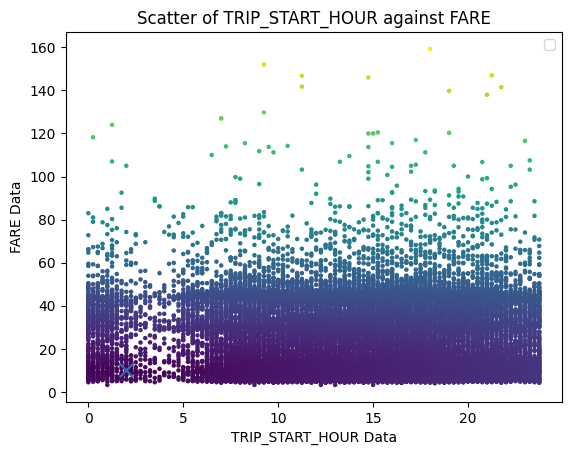

,TRIP_START_HOUR,FARE,PAYMENT_TYPE,EUCLIDEAN_DISTANCE
21209,2.00,10.00,Credit Card,0.000000
17068,2.00,10.22,Mobile,0.220000
8431,2.00,9.75,Credit Card,0.250000
26116,2.25,10.00,Cash,0.250000
15129,2.25,10.25,Credit Card,0.353553


In [8]:
target = [2, 10]  # Example target trip start hour and fare

data_frame['EUCLIDEAN_DISTANCE'] = np.sqrt((data_frame['TRIP_START_HOUR'] - target[0])**2 + (data_frame['FARE'] - target[1])**2)

plt.scatter(data_frame['TRIP_START_HOUR'], data_frame['FARE'], c=data_frame['EUCLIDEAN_DISTANCE'], cmap='viridis', s=5)
plt.scatter(target[0], target[1], marker='x', s=100)
plt.title(f"Scatter of {data_frame['TRIP_START_HOUR'].name} against {data_frame['FARE'].name}")
plt.ylabel(f'{data_frame['FARE'].name} Data')
plt.xlabel(f'{data_frame['TRIP_START_HOUR'].name} Data')
plt.legend()
plt.show()

data_frame.sort_values(by='EUCLIDEAN_DISTANCE', inplace=True)
data_frame[['TRIP_START_HOUR', 'FARE', 'PAYMENT_TYPE', 'EUCLIDEAN_DISTANCE']][:5]

Perhaps this indicates that a $10 fare at 2:00 PM is more likely to be cash.

Consider how many calculation were required to do this. For each point, we had to calculate the distance to every other point, then sort them and choose the closest few. This is a lot of work, especially if we have a lot of points. This dataset has 31,694 taxi trips. Every time we predict a point, we have to do this all over again for every data point. This is why KNN is not used for large datasets.

Your challenges now are:
1. Modify the KNN to use different variables from the dataframe, and see if you can build a better model!
1. Build a KNN model on one of the other included datasets!
1. Identify uses for a KNN model.
1. Summarise the strengths and weaknesses of this model compared to other models we have studied. 